In [1]:
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [3]:
from sklearn.metrics import *
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [4]:
import yfinance as yf 
from yfinance import download
from yfinance import Ticker
data = yf.Ticker("AAPL").history(period="1y")

In [5]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-10 00:00:00-04:00,184.280638,184.470004,181.519927,182.436844,50759500,0.25,0.0
2024-05-13 00:00:00-04:00,184.818854,186.473297,184.001593,185.656036,72044800,0.00,0.0
2024-05-14 00:00:00-04:00,186.881904,187.669266,185.665989,186.802170,52393600,0.00,0.0
2024-05-15 00:00:00-04:00,187.280568,190.011381,186.742369,189.084503,70400000,0.00,0.0
2024-05-16 00:00:00-04:00,189.831996,190.459891,189.024712,189.204102,52845200,0.00,0.0
...,...,...,...,...,...,...,...
2025-05-05 00:00:00-04:00,203.100006,204.100006,198.210007,198.889999,69018500,0.00,0.0
2025-05-06 00:00:00-04:00,198.210007,200.649994,197.020004,198.509995,51216500,0.00,0.0
2025-05-07 00:00:00-04:00,199.169998,199.440002,193.250000,196.250000,68616900,0.00,0.0


In [6]:
data.info


<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2024-05-10 00:00:00-04:00  184.280638  184.470004  181.519927  182.436844   
2024-05-13 00:00:00-04:00  184.818854  186.473297  184.001593  185.656036   
2024-05-14 00:00:00-04:00  186.881904  187.669266  185.665989  186.802170   
2024-05-15 00:00:00-04:00  187.280568  190.011381  186.742369  189.084503   
2024-05-16 00:00:00-04:00  189.831996  190.459891  189.024712  189.204102   
...                               ...         ...         ...         ...   
2025-05-05 00:00:00-04:00  203.100006  204.100006  198.210007  198.889999   
2025-05-06 00:00:00-04:00  198.210007  200.649994  197.020004  198.509995   
2025-05-07 00:00:00-04:00  199.169998  199.440002  193.250000  196.250000   
2025-05-08 00:00:00-04:00  197.720001  200.050003  194.679993  197.490005   
2025-05-09 00:00:00-04:00  199.000000  200.5

In [7]:
current_data = datetime.now()

In [8]:
start_time = datetime(current_data.year-1, current_data.month, current_data.day - 1) 

In [9]:
current_data

datetime.datetime(2025, 5, 10, 17, 4, 30, 391002)

In [10]:
data = yf.download("AAPL",start=start_time, end=current_data)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-05-09 to 2025-05-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   251 non-null    float64
 1   (High, AAPL)    251 non-null    float64
 2   (Low, AAPL)     251 non-null    float64
 3   (Open, AAPL)    251 non-null    float64
 4   (Volume, AAPL)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [12]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,222.157352,224.410469,219.494984,221.771013,5.608917e+07
std,17.023097,16.673224,17.295313,17.185929,3.238690e+07
min,172.419998,183.792164,169.210007,171.949997,2.323470e+07
25%,213.351433,215.283124,210.281107,212.894477,3.956285e+07
50%,224.256302,226.331875,222.515348,224.436039,4.807340e+07
75%,232.753716,234.517946,229.477700,232.697865,6.031885e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


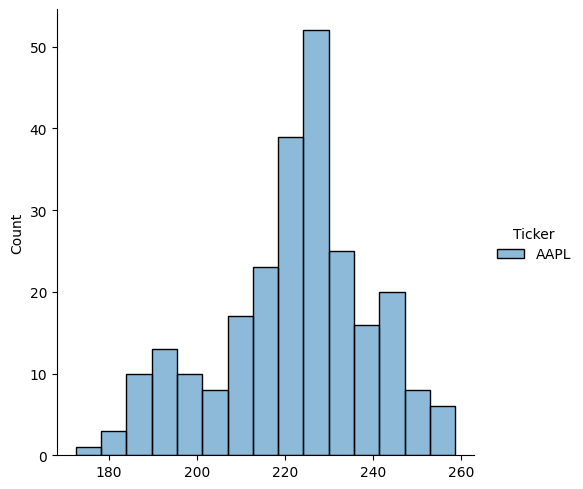

In [13]:
sns.displot(data["Close"])

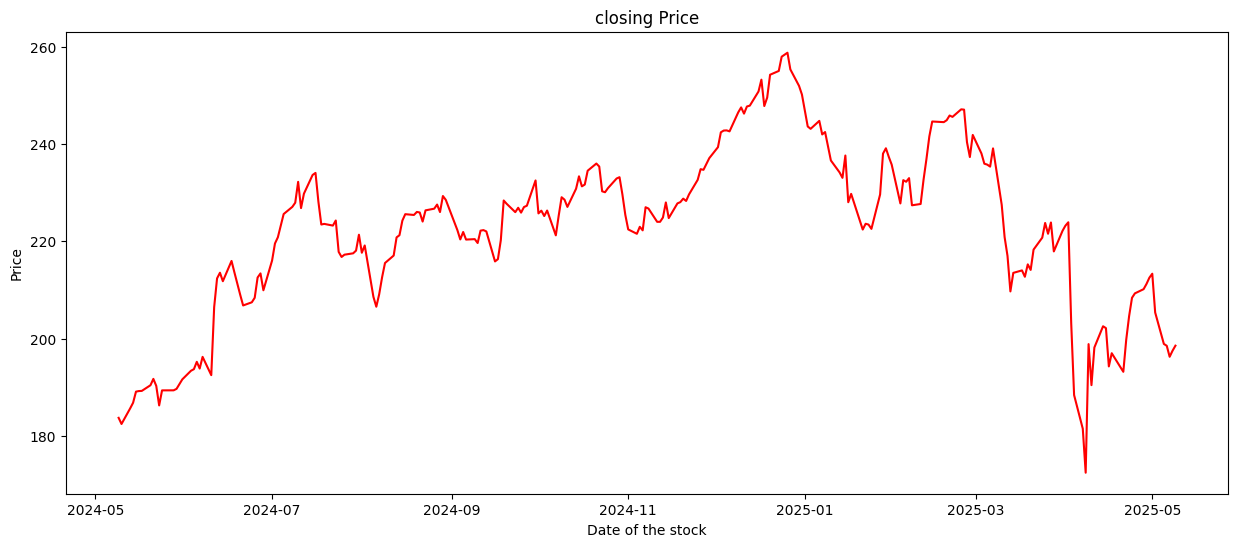

In [14]:
plt.figure(figsize=(15,6))
plt.plot(data.Close,color="red")
plt.title("closing Price")
plt.xlabel("Date of the stock")
plt.ylabel("Price")
plt.show()

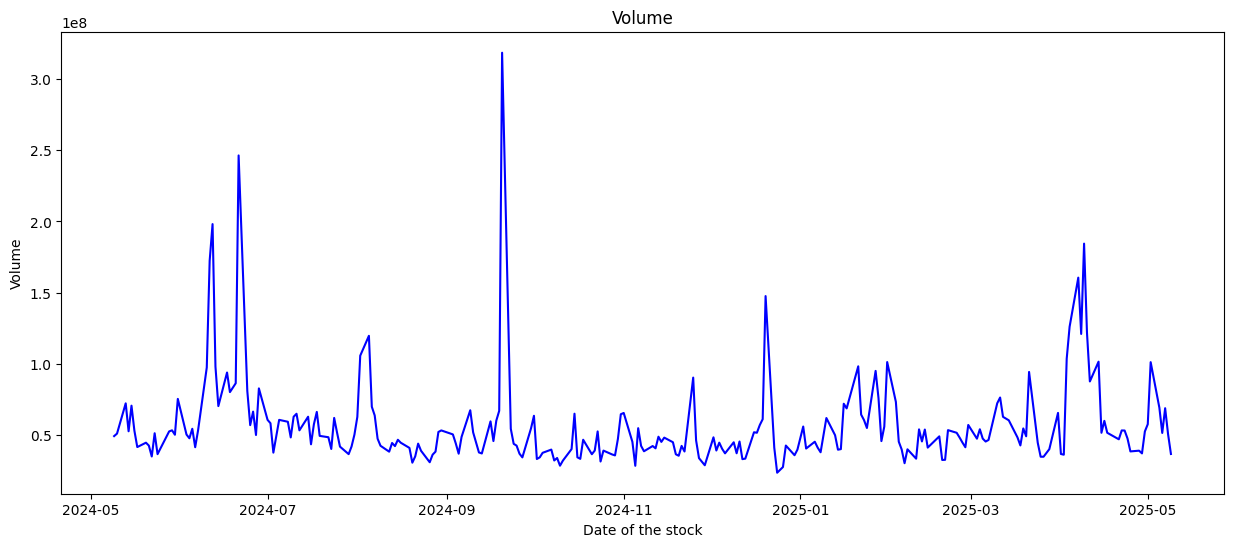

In [15]:
plt.figure(figsize=(15,6))
plt.plot(data["Volume"],color="blue")
plt.title("Volume")
plt.xlabel("Date of the stock") 
plt.ylabel("Volume")
plt.show()

In [16]:
moving_average = [10,20,50]
for x in moving_average:
    column_name = f"MA_{x} for {x } days"
    data[column_name] = data["Close"].rolling(x).mean()


In [17]:
data

Price,Close,High,Low,Open,Volume,MA_10 for 10 days,MA_20 for 20 days,MA_50 for 50 days
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2024-05-09,183.702591,183.792164,181.254145,181.702028,48983000,NaN,NaN,NaN
2024-05-10,182.436859,184.470019,181.519943,184.280653,50759500,NaN,NaN,NaN
2024-05-13,185.656021,186.473282,184.001578,184.818838,72044800,NaN,NaN,NaN
2024-05-14,186.802155,187.669251,185.665974,186.881888,52393600,NaN,NaN,NaN
2024-05-15,189.084518,190.011396,186.742384,187.280584,70400000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-05-05,198.889999,204.100006,198.210007,203.100006,69018500,207.340002,200.188502,214.656401
2025-05-06,198.509995,200.649994,197.020004,198.210007,51216500,207.217001,201.041001,213.684601


In [18]:
data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
fig = px.line(
    data,
    x=data.index,
    y=["Close AAPL", "MA_10 for 10 days", "MA_20 for 20 days", "MA_50 for 50 days"],
    title="Apple Stock Data with Moving Averages"
)
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend"
)
fig.show()

In [27]:
# Check for missing values
data.isnull().sum()

Price              Ticker
Close              AAPL        0
High               AAPL        0
Low                AAPL        0
Open               AAPL        0
Volume             AAPL        0
MA_10 for 10 days            251
MA_20 for 20 days            251
MA_50 for 50 days            251
dtype: int64

In [28]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

In [29]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [30]:
# Create sequences for LSTM
sequence_length = 60
generator = TimeseriesGenerator(train_data, train_data, length=sequence_length, batch_size=32)

In [31]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Train the model
model.fit(generator, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.2791
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0325
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0528
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0208
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0177
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0099
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0111
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0112
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0066
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0076


In [33]:
# Evaluate the model
test_generator = TimeseriesGenerator(test_data, test_data, length=sequence_length, batch_size=32)
predictions = model.predict(test_generator)

ValueError: `start_index+length=60 > end_index=50` is disallowed, as no part of the sequence would be left to be used as current step.

In [ ]:
# Visualize predictions
plt.figure(figsize=(15,6))
plt.plot(test_data[sequence_length:], label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()